In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sym
import scipy.optimize as opt


In [12]:
file_name = 'TDPA.csv'
data = pd.read_csv(file_name)
data

,Lectura,Tiempo transcurrido (min),Numero de coches (total)
0,1,15,558
1,2,30,575
2,3,45,612
3,4,60,620
4,5,75,615
5,6,90,602
6,7,105,580
7,8,120,577


In [23]:
x = data.iloc[:,1].values
y = data.iloc[:,2].values

In [24]:
def fun_obj(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    e = y-yhat
    return np.sum(e**2)

In [25]:
b01 = np.zeros(2)
b02 = np.zeros(3)
b03 = np.zeros(4)

ajuste1 = opt.minimize(fun_obj,b01,args=(x,y,1))
ajuste2 = opt.minimize(fun_obj,b02,args=(x,y,2))
ajuste3 = opt.minimize(fun_obj,b03,args=(x,y,3))

In [26]:
ajuste1

      fun: 3535.8214285714703
 hess_inv: array([[ 6.26272633e-02, -2.34693289e-07],
       [-2.34693289e-07,  3.46472007e-09]])
      jac: array([0.00000000e+00, 6.10351562e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 49
      nit: 9
     njev: 12
   status: 2
  success: False
        x: array([5.85785719e+02, 9.76189833e-02])

In [27]:
ajuste2

      fun: 475.76785822414604
 hess_inv: array([[ 9.73581031e-01, -3.03771402e-02,  1.98571757e-04],
       [-3.03771402e-02,  1.12542953e-03, -7.94518596e-06],
       [ 1.98571757e-04, -7.94518596e-06,  5.88579822e-08]])
      jac: array([-9.91821289e-05, -5.86318970e-03,  4.11987305e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 212
      nit: 5
     njev: 40
   status: 2
  success: False
        x: array([ 5.21766648e+02,  2.65838147e+00, -1.89686105e-02])

In [28]:
ajuste3

      fun: 334.8784175646344
 hess_inv: array([[ 3.05030562e+00, -1.74249939e-01,  2.71165869e-03,
        -1.24072368e-05],
       [-1.74249939e-01,  1.10947498e-02, -1.82097259e-04,
         8.59832149e-07],
       [ 2.71165869e-03, -1.82097259e-04,  3.10092532e-06,
        -1.50185756e-08],
       [-1.24072368e-05,  8.59832149e-07, -1.50185756e-08,
         7.41419600e-11]])
      jac: array([ 3.81469727e-06,  1.25885010e-04,  5.31768799e-03, -2.67028809e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 143
      nit: 10
     njev: 22
   status: 2
  success: False
        x: array([ 4.98561716e+02,  4.26787961e+00, -4.70957254e-02,  1.38899196e-04])

In [29]:
beta1 = ajuste1.x
beta2 = ajuste2.x
beta3 = ajuste3.x

In [30]:
yhat1 = beta1[0] + beta1[1]*x
yhat2 = beta2[0] + beta2[1]*x + beta2[2]*x**2
yhat3 = beta3[0] + beta3[1]*x + beta3[2]*x**2 + beta3[3]*x**3

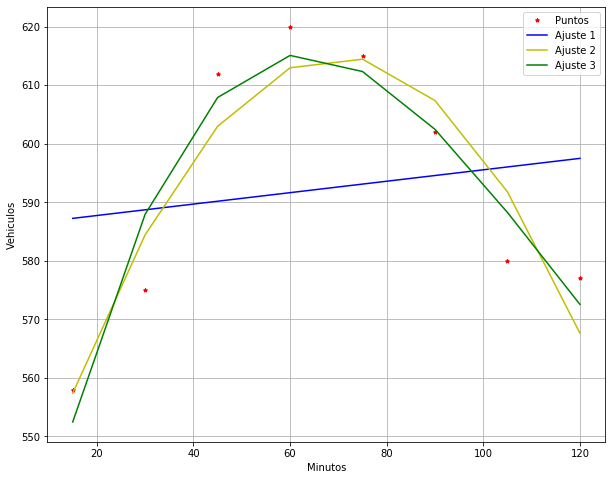

In [40]:
plt.figure(figsize=(10,8))
plt.plot(x,y,'r*',ms = 4,label='Puntos')
plt.plot(x,yhat1,'b',ms = 6,label='Ajuste 1')
plt.plot(x,yhat2,'y',ms = 6,label='Ajuste 2')
plt.plot(x,yhat3,'g',ms = 6,label='Ajuste 3')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Minutos')
plt.ylabel('Vehiculos')
plt.show()

Text(0, 0.5, 'Error')

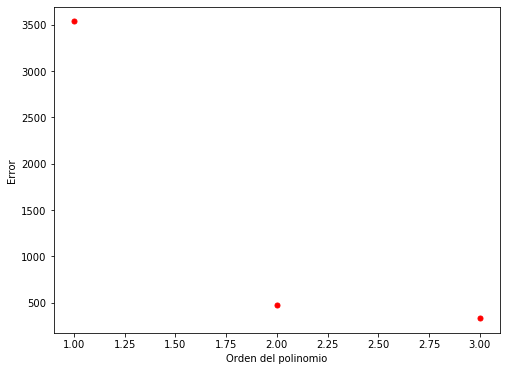

In [41]:
error = [ajuste1.fun,ajuste2.fun,ajuste3.fun]
plt.figure(figsize=(8,6))
plt.plot(range(1,4),error,'ro',ms=5)
plt.xlabel('Orden del polinomio')
plt.ylabel('Error')

In [44]:
#El polinomio que más se ajusta es el 3 de acuerdo a la gráfica